In [73]:
import os
import pandas as pd

df = pd.read_csv(os.path.join("oxytrace", "dataset", "dataset.csv"))


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7128273 entries, 0 to 7128272
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   time           object 
 1   Oxygen[%sat]   float64
 2   EquipmentUnit  object 
 3   SubUnit        object 
 4   System         object 
 5   Unit           object 
dtypes: float64(1), object(5)
memory usage: 326.3+ MB


In [4]:
df["Oxygen[%sat]"].describe()

count    1.630860e+06
mean     8.774095e+01
std      5.954170e+00
min     -2.170147e-02
25%      8.459909e+01
50%      8.881170e+01
75%      9.098113e+01
max      1.413579e+02
Name: Oxygen[%sat], dtype: float64

In [74]:
df["date_only"] = pd.to_datetime(df["time"], errors='coerce', exact=False)

df["date_only"] = df["date_only"].dt.date

df["o2_val_missing"] = df["Oxygen[%sat]"].isna()

In [19]:
df["date_only"].head()
df["o2_val_missing"].tail()


7128268    False
7128269    False
7128270    False
7128271    False
7128272    False
Name: o2_val_missing, dtype: bool

In [88]:
date_wise_missing_data = df.groupby("date_only")["o2_val_missing"].agg(
    missing="sum",
    present=lambda x: (~x).sum()
)

date_wise_missing_data["%_of_data_missing_data"] = \
    (date_wise_missing_data["present"] * 100) / (date_wise_missing_data["missing"] + date_wise_missing_data["present"])

date_wise_missing_data = date_wise_missing_data.reset_index()

In [89]:
date_wise_missing_data.columns

Index(['date_only', 'missing', 'present', '%_of_data_missing_data'], dtype='object')

In [90]:
date_wise_missing_data = date_wise_missing_data.sort_values("%_of_data_missing_data", ascending=False)


In [91]:
date_wise_missing_data

,date_only,missing,present,%_of_data_missing_data
170,2025-09-18,14536,7200,33.124770
63,2025-06-03,15840,7200,31.250000
61,2025-06-01,15840,7200,31.250000
135,2025-08-14,15840,7200,31.250000
58,2025-05-29,15840,7200,31.250000
...,...,...,...,...
192,2025-10-10,58507,7135,10.869565
193,2025-10-11,59040,7200,10.869565
194,2025-10-12,59040,7200,10.869565
195,2025-10-13,58958,7190,10.869565


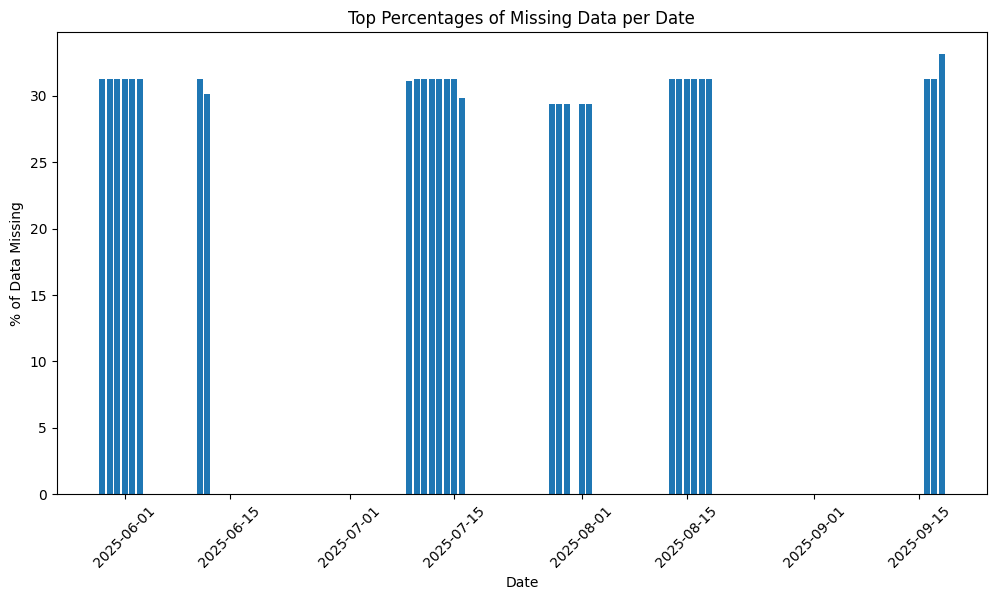

In [124]:
import matplotlib.pyplot as plt

top15 = date_wise_missing_data.nlargest(30, "%_of_data_missing_data")

# Bar plot: x = date_only, y = %_of_data_missing_data
plt.figure(figsize=(12, 6))
plt.bar(
    top15["date_only"],
    top15["%_of_data_missing_data"]
    
)
plt.xlabel("Date")
plt.ylabel("% of Data Missing")


plt.title("Top Percentages of Missing Data per Date")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

In [118]:
curated_df = df[df["o2_val_missing"] == False]

print(df.shape)
print(curated_df.shape)

(7128273, 8)
(1630860, 8)


In [119]:
curated_df.drop(columns=["date_only", "o2_val_missing"], inplace=True)

/var/folders/6b/qgp33bqn7knbrt8q3tccmck40000gp/T/ipykernel_98107/836700967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curated_df.drop(columns=["date_only", "o2_val_missing"], inplace=True)


In [120]:
curated_df = curated_df.sort_values("time", ascending=True)

In [115]:
df

,time,Oxygen[%sat],EquipmentUnit,SubUnit,System,Unit,date_only,o2_val_missing
0,2025-04-01 17:43:00,NaN,EquipmentUnit_05,NaN,System_01,Unit_01,2025-04-01,True
1,2025-04-01 17:44:00,NaN,EquipmentUnit_05,NaN,System_01,Unit_01,2025-04-01,True
2,2025-04-01 17:45:00,NaN,EquipmentUnit_05,NaN,System_01,Unit_01,2025-04-01,True
3,2025-04-01 17:46:00,NaN,EquipmentUnit_05,NaN,System_01,Unit_01,2025-04-01,True
4,2025-04-01 17:47:00,NaN,EquipmentUnit_05,NaN,System_01,Unit_01,2025-04-01,True
...,...,...,...,...,...,...,...,...
7128268,2025-11-13 23:55:00,87.648140,EquipmentUnit_11,NaN,System_10,Unit_01,2025-11-13,False
7128269,2025-11-13 23:56:00,87.377449,EquipmentUnit_11,NaN,System_10,Unit_01,2025-11-13,False
7128270,2025-11-13 23:57:00,87.434769,EquipmentUnit_11,NaN,System_10,Unit_01,2025-11-13,False
7128271,2025-11-13 23:58:00,87.449242,EquipmentUnit_11,NaN,System_10,Unit_01,2025-11-13,False


In [121]:
curated_df = curated_df.reset_index(drop=True)

In [125]:
curated_df

,time,Oxygen[%sat],EquipmentUnit,SubUnit,System,Unit
0,2025-04-01 17:43:00,90.521339,EquipmentUnit_10,SubUnit_07,System_10,Unit_01
1,2025-04-01 17:43:00,91.639549,EquipmentUnit_05,NaN,System_10,Unit_01
2,2025-04-01 17:43:00,89.844864,EquipmentUnit_11,NaN,System_10,Unit_01
3,2025-04-01 17:43:00,91.377579,EquipmentUnit_10,SubUnit_08,System_10,Unit_01
4,2025-04-01 17:43:00,91.935204,EquipmentUnit_06,NaN,System_10,Unit_01
...,...,...,...,...,...,...
1630855,2025-11-14 09:31:00,92.051758,EquipmentUnit_06,NaN,System_10,Unit_01
1630856,2025-11-14 09:31:00,83.615448,EquipmentUnit_10,SubUnit_07,System_10,Unit_01
1630857,2025-11-14 09:31:00,86.161560,EquipmentUnit_10,SubUnit_08,System_10,Unit_01
1630858,2025-11-14 09:31:00,92.001213,EquipmentUnit_05,NaN,System_10,Unit_01


In [126]:
curated_df.to_csv(os.path.join("oxytrace", "dataset", "curated_dataset.csv"))